In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import math

## Считываем данные

In [ ]:
df = pd.read_csv('data/case_dataset.csv', index_col=0)
games_df = pd.read_csv('data/dictionary_games_category.csv')

players_df = df[~df['games'].apply(lambda x: x == '{}')]

## Обрабатываем выбросы по возрасту.

Поскольку мы имеем довольно малую выборку играющих пользователей (всего лишь 56К человек) из 1КК юзеров всего, нам стоит максимально трепетно относиться к каждой записи в сете и стараться избегать удаления их. Поэтому, мы распределили юзеров с возрастом 90+ среди 30 самых популярных возрастов в датасете, это сделано, чтобы сохранить записи игроков, при этом не ломая статистику по возрасту

In [ ]:
res = df[df.age < 90].age.value_counts().to_dict()

most_popular_ages = sorted(res.items(), key=lambda x: x[1], reverse=True)[:30]
extra_ages = range(120, 90, -1)

for (age, _), old_age in zip(most_popular_ages, extra_ages):
    df.loc[df.age == old_age, 'age'] = age

## Аналитика игр по категориям

In [101]:
games_strings = players_df.games.to_dict()
games_starts = {}

for user_id, games in games_strings.items():
    for game in games[1:-1].split(','):
        game_id, cnt_starts = list(map(int, game.split(':')))
        if game_id not in games_starts:
            games_starts[game_id] = cnt_starts
        else:
            games_starts[game_id] += cnt_starts

categories_starts  = {category:0 for category in categories.keys().tolist()}

categories_dct = games_df.set_index('game_id')['game_category'].to_dict()

for game_id, cnt_starts in games_starts.items():
    if game_id in categories_dct:
        categories_starts[categories_dct[game_id]] += cnt_starts

In [102]:
categories = games_df.game_category.value_counts()


C:\Users\slava\AppData\Local\Temp\ipykernel_11392\4247237662.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x, ha='right', rotation=30)


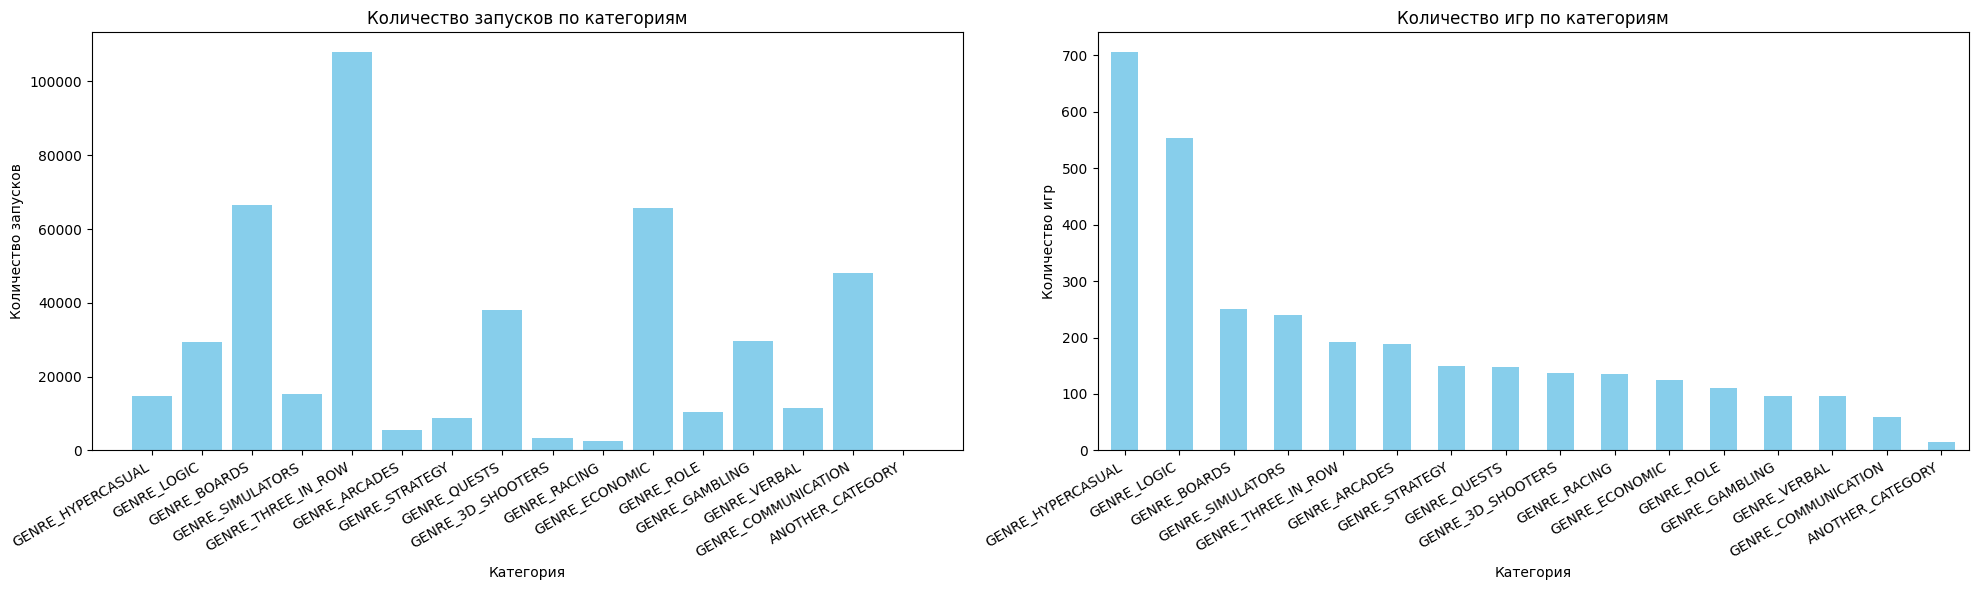

In [104]:
x = list(categories_starts.keys())
y = list(categories_starts.values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Первый график - Количество запусков по категориям
ax1.bar(x, y, color='skyblue')
ax1.set_title('Количество запусков по категориям')
ax1.set_xlabel('Категория')
ax1.set_ylabel('Количество запусков')
ax1.set_xticklabels(x, ha='right', rotation=30)

# Второй график - Количество игр по категориям
categories.plot(kind='bar', color='skyblue', ax=ax2)
ax2.set_title('Количество игр по категориям')
ax2.set_xlabel('Категория')
ax2.set_ylabel('Количество игр')
ax2.set_xticklabels(x, ha='right', rotation=30)

plt.tight_layout()
plt.show()

На этих графиках мы видим количество представленных игр в той или иной категории, а так же количество запусков игр по тем или иным категориям. По ним мы понимаем, что у нас есть перенасыщение определённых категорий играми, которые не востребованы у пользователей, вероятнее всего эти категории переполнены низкокачественными решениями, что мешает пользователю найти хорошую, качественную игру

## Исследуем время и деньги по категориям

In [112]:
categories_time = {category:0 for category in categories.keys().tolist()}
categories_dct = games_df.set_index('game_id')['game_category'].to_dict()
games_starts = {}

for user_id, games in games_strings.items():
    all_starts = 0
    user_stat = []
    for game in games[1:-1].split(','):
        game_id, cnt_starts = list(map(int, game.split(':')))
        user_stat.append((game_id, cnt_starts))
    all_starts = sum(user[1] for user in user_stat)
    total_time = players_df.avg_daily_ts_games.loc[user_id]
    single_time = total_time / all_starts
    
    for game_id, cnt_starts in user_stat:
        if game_id in categories_dct:
            if not pd.isna(single_time):
                categories_time[categories_dct[game_id]] += single_time * cnt_starts


In [113]:
categories_money_ads = {category:0 for category in categories.keys().tolist()}
categories_dct = games_df.set_index('game_id')['game_category'].to_dict()
games_starts = {}

for user_id, games in games_strings.items():
    all_starts = 0
    user_stat = []
    for game in games[1:-1].split(','):
        game_id, cnt_starts = list(map(int, game.split(':')))
        user_stat.append((game_id, cnt_starts))
    all_starts = sum(user[1] for user in user_stat)
    total_money = players_df.games_revenue_ads.loc[user_id]
    money_by_game = total_money / all_starts
    
    for game_id, cnt_starts in user_stat:
        if game_id in categories_dct:
            if not pd.isna(money_by_game):
                categories_money_ads[categories_dct[game_id]] += money_by_game

In [114]:
categories_money_in_app = {category:0 for category in categories.keys().tolist()}
categories_dct = games_df.set_index('game_id')['game_category'].to_dict()
games_starts = {}

for user_id, games in games_strings.items():
    all_starts = 0
    user_stat = []
    for game in games[1:-1].split(','):
        game_id, cnt_starts = list(map(int, game.split(':')))
        user_stat.append((game_id, cnt_starts))
    all_starts = sum(user[1] for user in user_stat)
    total_money = players_df.games_revenue_in_app.loc[user_id]
    money_by_game = total_money / all_starts
    
    for game_id, cnt_starts in user_stat:
        if game_id in categories_dct:
            if not pd.isna(money_by_game):
                categories_money_in_app[categories_dct[game_id]] += money_by_game

C:\Users\slava\AppData\Local\Temp\ipykernel_11392\2368706324.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x, ha='right', rotation=30)
C:\Users\slava\AppData\Local\Temp\ipykernel_11392\2368706324.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(x, ha='right', rotation=30)
C:\Users\slava\AppData\Local\Temp\ipykernel_11392\2368706324.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(x, ha='right', rotation=30)


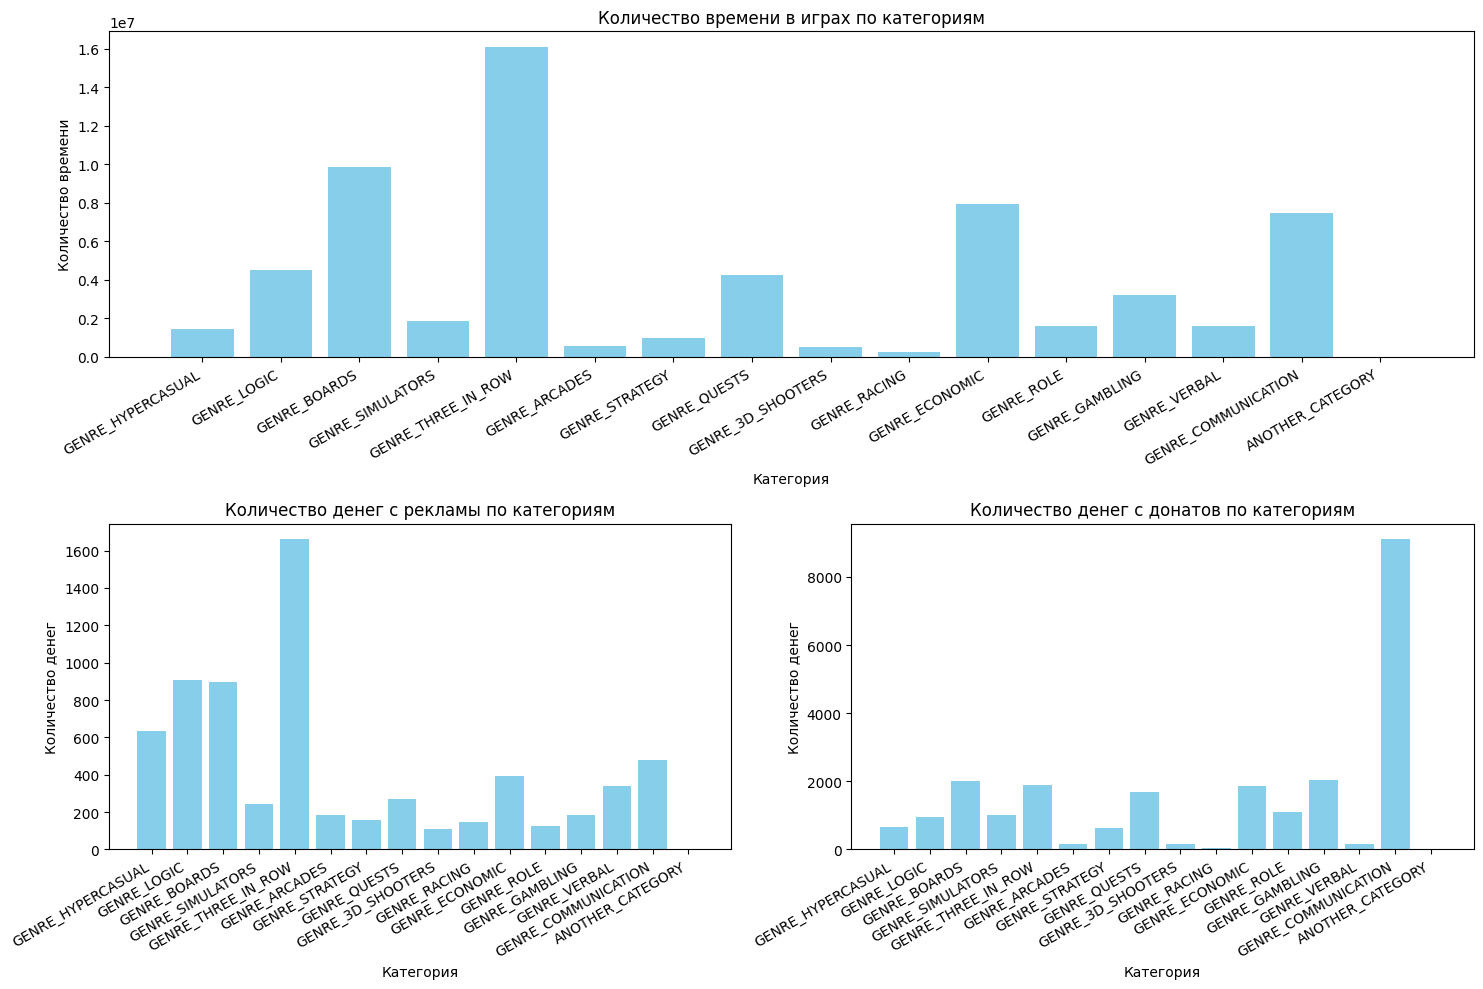

In [116]:
ads_x = list(categories_money_ads.keys())
asd_y = list(categories_money_ads.values())\

time_x = list(categories_time.keys())
time_y = list(categories_time.values())

money_x = list(categories_money_in_app.keys())
money_y = list(categories_money_in_app.values())


fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.bar(time_x, time_y, color='skyblue')
ax1.set_title('Количество времени в играх по категориям')
ax1.set_xlabel('Категория')
ax1.set_ylabel('Количество времени')
ax1.set_xticklabels(x, ha='right', rotation=30)

ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(ads_x, asd_y, color='skyblue')
ax2.set_title('Количество денег с рекламы по категориям')
ax2.set_xlabel('Категория')
ax2.set_ylabel('Количество денег')
ax2.set_xticklabels(x, ha='right', rotation=30)

ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(money_x, money_y, color='skyblue')
ax3.set_title('Количество денег с донатов по категориям')
ax3.set_xlabel('Категория')
ax3.set_ylabel('Количество денег')
ax3.set_xticklabels(x, ha='right', rotation=30)

plt.tight_layout()
plt.show()

По представленным выше графикам, мы можем сделать вывод о том, какие категории приносят сервису больше всего денег с точки зрения рекламы (равномерно с количеством проведённого времени, что логично), а также с точки зрения донатов внутрь игры